In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [4]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
Smarket.corr(numeric_only=True)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [6]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anac

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [7]:
results.params


intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [8]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [9]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [10]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up" 

In [11]:
confusion_table(labels, Smarket.Direction)


Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [12]:
((145+507)/(145+141+457+507), np.mean(labels==Smarket.Direction))

(0.5216, 0.5216)

In [13]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

(252, 9)

In [14]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [15]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [16]:
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [17]:
np.mean(labels == L_test), np.mean(labels != L_test)


(0.4801587301587302, 0.5198412698412699)

In [18]:
# model = MS(['Lag1', 'Lag2']).fit(Smarket)
# X = model.transform(Smarket)
# X_train, X_test = X.loc[train], X.loc[~train]
# glm_train = sm.GLM(y_train,
#                    X_train,
#                    family=sm.families.Binomial())
# results = glm_train.fit()
# probs = results.predict(exog=X_test)
# labels = np.array(['Down']*252)
# labels[probs>0.5] = 'Up'
# confusion_table(labels, L_test)

model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anac

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [19]:
(35+106)/252,106/(106+76)


(0.5595238095238095, 0.5824175824175825)

In [20]:
newdata = pd.DataFrame({'Lag1':[1.2, 1.5],
                        'Lag2':[1.1, -0.8]});
newX = model.transform(newdata)
print(newX)
# results.predict(newX)


   intercept  Lag1  Lag2
0        1.0   1.2   1.1
1        1.0   1.5  -0.8


In [21]:
lda = LDA(store_covariance=True)


In [22]:
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [23]:
lda.means_

array([[ 4.27902240e-02,  3.38940937e-02, -9.80651731e-03,
        -1.05987780e-02,  4.36659878e-03,  1.37184259e+00],
       [-3.95463511e-02, -3.13254438e-02,  5.83431953e-03,
         3.11045365e-03, -6.50887574e-04,  1.36320990e+00]])

In [24]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [25]:
lda.priors_


array([0.49198397, 0.50801603])

In [26]:
lda.scalings_


array([[-0.58081056],
       [-0.49111007],
       [ 0.07707664],
       [ 0.06904095],
       [-0.04549853],
       [-1.24678716]])

In [27]:
lda_pred = lda.predict(X_test)

In [28]:
confusion_table(lda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [29]:
lda_prob = lda.predict_proba(X_test)
np.all(
       np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred
       )


True

In [30]:
np.all(
       [lda.classes_[i] for i in np.argmax(lda_prob, 1)] == lda_pred
       )

True

In [31]:
np.sum(lda_prob[:,0] > 0.9)


0

In [32]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [33]:
qda.means_, qda.priors_


(array([[ 4.27902240e-02,  3.38940937e-02, -9.80651731e-03,
         -1.05987780e-02,  4.36659878e-03,  1.37184259e+00],
        [-3.95463511e-02, -3.13254438e-02,  5.83431953e-03,
          3.11045365e-03, -6.50887574e-04,  1.36320990e+00]]),
 array([0.49198397, 0.50801603]))

In [34]:
qda.covariance_[0]


array([[ 1.50662277, -0.03924806, -0.1161981 ,  0.02773081,  0.10375151,
         0.01264993],
       [-0.03924806,  1.53559498, -0.05837697,  0.00911436,  0.00535896,
        -0.02853927],
       [-0.1161981 , -0.05837697,  1.5261648 ,  0.02759497, -0.0866616 ,
        -0.02793508],
       [ 0.02773081,  0.00911436,  0.02759497,  1.60391547, -0.08697959,
        -0.03358478],
       [ 0.10375151,  0.00535896, -0.0866616 , -0.08697959,  1.44963901,
         0.00287333],
       [ 0.01264993, -0.02853927, -0.02793508, -0.03358478,  0.00287333,
         0.0758683 ]])

In [35]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,82,111
Up,29,30


In [36]:
np.mean(qda_pred == L_test)


0.4444444444444444

In [37]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [38]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [39]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [40]:
NB.theta_

array([[ 4.27902240e-02,  3.38940937e-02, -9.80651731e-03,
        -1.05987780e-02,  4.36659878e-03,  1.37184259e+00],
       [-3.95463511e-02, -3.13254438e-02,  5.83431953e-03,
         3.11045365e-03, -6.50887574e-04,  1.36320990e+00]])

In [41]:
NB.var_

array([[1.50355429, 1.53246749, 1.52305652, 1.60064884, 1.44668659,
        0.07571378],
       [1.51401364, 1.48732877, 1.51198994, 1.43804198, 1.63638575,
        0.06747517]])

In [42]:
NB?

In [43]:
X_train[L_train == 'Down'].mean()


Lag1      0.042790
Lag2      0.033894
Lag3     -0.009807
Lag4     -0.010599
Lag5      0.004367
Volume    1.371843
dtype: float64

In [44]:
X_train[L_train == "Down"].var(ddof = 0)

Lag1      1.503554
Lag2      1.532467
Lag3      1.523057
Lag4      1.600649
Lag5      1.446687
Volume    0.075714
dtype: float64

In [45]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,85,111
Up,26,30


In [46]:
NB.predict_proba(X_test)[:5]

array([[0.52512367, 0.47487633],
       [0.46691112, 0.53308888],
       [0.48813902, 0.51186098],
       [0.50349077, 0.49650923],
       [0.50231369, 0.49768631]])

In [47]:
knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,50,62
Up,61,79


In [48]:
(83+43)/252, np.mean(knn1_pred == L_test)

(0.5, 0.5119047619047619)

In [49]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

0.503968253968254

In [50]:
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()


Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [51]:
348 / 5822


0.05977327378907592

In [52]:
feature_df = Caravan.drop(columns=['Purchase'])

In [53]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

In [54]:
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

In [55]:
feature_std = pd.DataFrame(
                 X_std,
                 columns=feature_df.columns);
feature_std.std()


MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [56]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(np.asarray(feature_std),
                            Purchase,
                            test_size=1000,
                            random_state=0)

In [57]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(np.asarray(X_test))
np.mean(y_test != knn1_pred), np.mean(y_test != "No")

(0.111, 0.067)

In [58]:
confusion_table(knn1_pred, y_test)


Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [59]:
5/(59+5)

0.078125

In [60]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
            '  # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(
          K,
          pred,
          did_rent,
          did_rent / pred))


K=1: # predicted to rent: 62,  # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6,  # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20,  # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4,  # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7,  # who did rent 1, accuracy 14.3%


In [61]:
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > .5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [62]:
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [63]:
9/(20+9)


0.3103448275862069

In [64]:
Bike = load_data('Bikeshare')


In [65]:
Bike.shape, Bike.columns


((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [66]:
X = MS(['mnth',
        'hr',
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:152: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_ordinal[i]:
C:\Users\jason\anaconda

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [67]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')

In [68]:
X2 = MS([mnth_encode,
         hr_encode,
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2

C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\columns.py:152: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_ordinal[i]:
C:\Users\jason\anaconda

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [69]:
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)


4.9793657337941246e-20

In [70]:
np.allclose(M_lm.fittedvalues, M2_lm.fittedvalues)


True

In [71]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

In [72]:
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([
                       coef_month,
                       pd.Series([-coef_month.sum()],
                                  index=['mnth[Dec]'
                                 ])
                       ])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

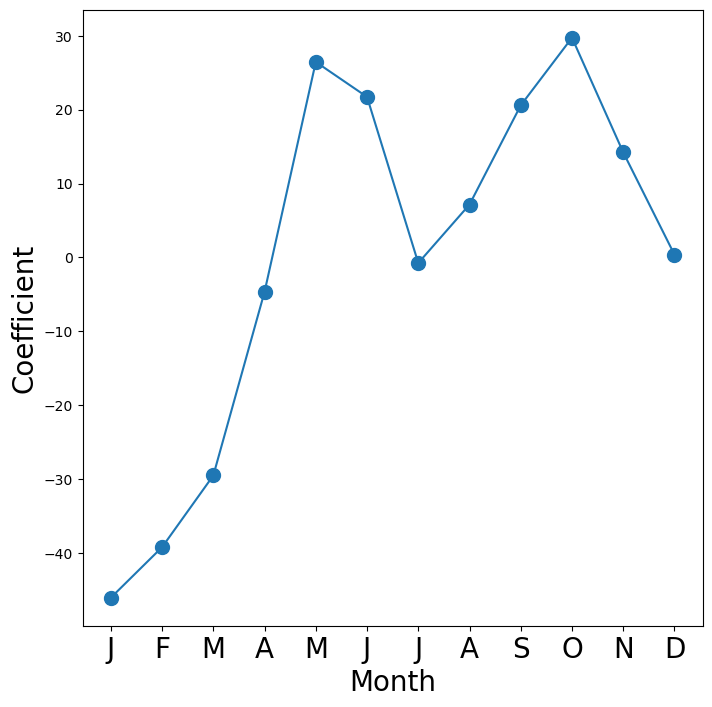

In [73]:
fig_month, ax_month = subplots(figsize=(8,8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20);

In [74]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex(['hr[{0}]'.format(h) for h in range(23)])
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()], index=['hr[23]'])
                    ])


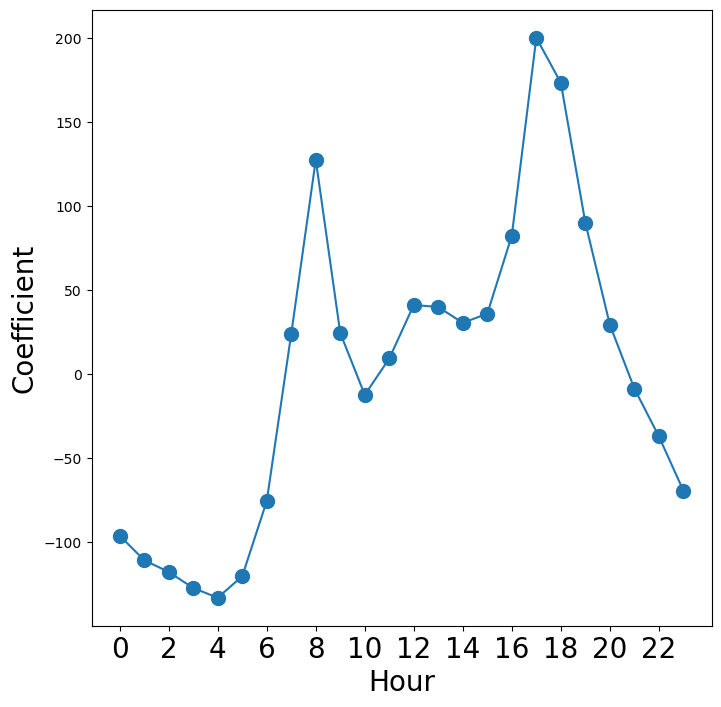

In [75]:
fig_hr, ax_hr = subplots(figsize=(8,8))
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);

In [76]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()

In [77]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month,
                        pd.Series([-coef_month.sum()],
                                   index=['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()],
                     index=['hr[23]'])])

C:\Users\jason\anaconda3\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


C:\Users\jason\AppData\Local\Temp\ipykernel_40872\3779905754.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_hr.set_xticklabels(range(24)[::2], fontsize=20)


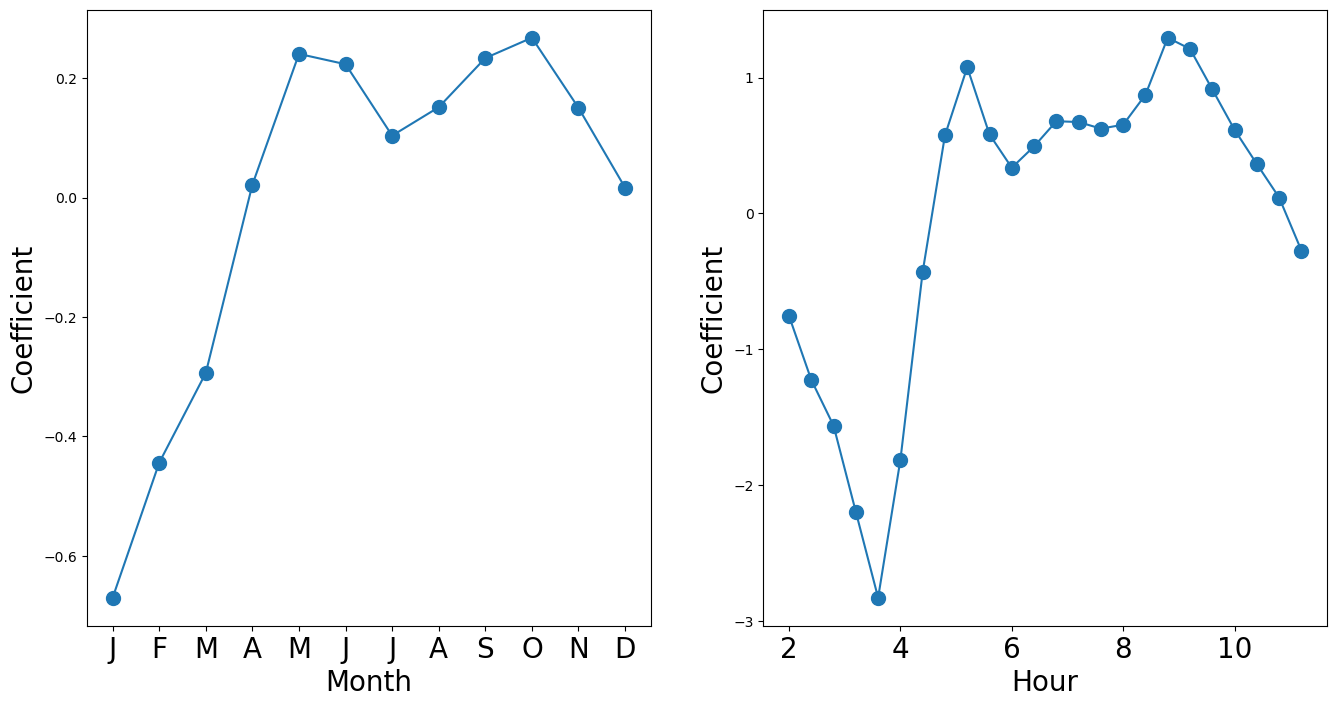

In [78]:
fig_pois, (ax_month, ax_hr) = subplots(1, 2, figsize=(16,8))
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);


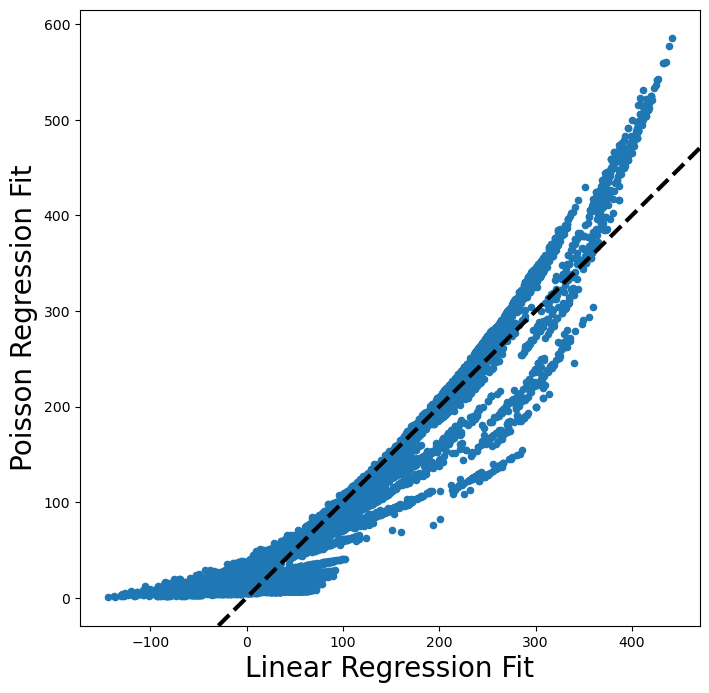

In [79]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(M2_lm.fittedvalues,
           M_pois.fittedvalues,
           s=20)
ax.set_xlabel('Linear Regression Fit', fontsize=20)
ax.set_ylabel('Poisson Regression Fit', fontsize=20)
ax.axline([0,0], c='black', linewidth=3,
          linestyle='--', slope=1);

#1
Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefcients of the
linear model.

The null hypotheses would be that each indivdual factor such as TV, radio, or newspaper has no effect on the sales. Based on the p values presented in the table, TV and radio most likely have an effect on sales while newspapers ads most likely do not have


#4
A)  I feel like it would be about the same since they should be around the same if it is truly linear. But the cubic regression will probably overfit to compensate for the error. It will result in a lower RSS since it is overfitted

B) The linear regression would do the best with test data since that is what it truly is. Since the cubic regression is overfitted to compensate for the error, it'll result in a less accurate test

C) I would still say the RSS of the cubic would be less since it has less variability and is more flexible in fitting the data. The linear function would be more rigid and have a higher RSS.

D) I don't think we have enough information here to say one would preform better on a test since we don't know what the actual data is. The linear model could have high bias while the cubic model could have high variance. It could lean more towards being linear than cubic or the other way around

#6 Using (3.4), argue that in the case of simple linear regression, the
least squares line always passes through the point (¯x, y¯.

I'm not too sure what the x bar and y bar means but I am guessing the averages of x and y respectively. If that is the case, then it makes sense on a conceptual level that the linear regression would go through it. The average would be the closest to everything since it takes every data point and calculates a middle. 